**MAX VOTING AVERAGING & WEIGHTED AVERAGE VOTING (REGRESSION)**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:

np.random.seed(42)

num_students = 1000
cgpa = np.random.normal(loc=7.5, scale=1.5, size=num_students)
cgpa = np.clip(cgpa, 5, 10)


base_package = 3.0
cgpa_factor = 0.8
package_noise = np.random.normal(loc=0, scale=1.0, size=num_students)
package = base_package + cgpa_factor * cgpa + package_noise
package = np.maximum(package, 3.0)

data = {'CGPA': cgpa, 'Package': package}
df = pd.DataFrame(data)

df.head()


,CGPA,Package
0,8.245071,10.995412
1,7.292604,9.758717
2,8.471533,9.836857
3,9.784545,10.180699
4,7.148770,9.417239


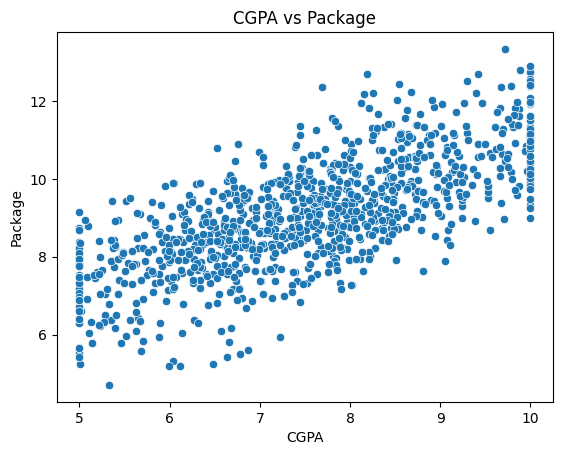

In [109]:
sns.scatterplot(data=df, x='CGPA', y='Package')
plt.title('CGPA vs Package')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [111]:
x = df.drop('Package', axis=1)
y = df['Package']

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [148]:
li = LinearRegression()
li.fit(x_train, y_train)


LinearRegression()

In [149]:
li.score(x_test, y_test)*100, li.score(x_train, y_train)*100

(54.438002604735836, 51.506895467814)

In [150]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [151]:
dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100

(23.21089031173277, 95.85926434549312)

In [152]:
sr = SVR()
sr.fit(x_train, y_train)

SVR()

In [153]:
sr.score(x_test, y_test)*100, sr.score(x_train, y_train)*100

(53.22770419236622, 51.3013671573721)

In [154]:
from sklearn.ensemble import VotingRegressor

In [155]:
lis =[('li', li), ('dt', dt), ('sr', sr)]

In [156]:
vr = VotingRegressor(lis)
vr.fit(x_train, y_train)

VotingRegressor(estimators=[('li', LinearRegression()),
                            ('dt', DecisionTreeRegressor()), ('sr', SVR())])

In [157]:
vr.score(x_test, y_test)*100, vr.score(x_train, y_train)*100

(53.39554301149002, 76.15073444019306)

In [158]:
data = {"li":li.predict(x_test), "dt":dt.predict(x_test), "sr":sr.predict(x_test), "vr":vr.predict(x_test)}

In [159]:
pd.DataFrame(data)

,li,dt,sr,vr
0,9.702432,9.115837,9.557271,9.458513
1,10.200380,10.147957,10.168412,10.172249
2,7.197533,7.119974,7.281065,7.199524
3,8.436371,9.949199,8.537765,8.974445
4,7.811877,7.104009,7.922888,7.612925
...,...,...,...,...
195,9.222920,8.242325,9.132190,8.865811
196,9.172492,8.528594,9.093471,8.931519
197,9.670341,8.916051,9.524068,9.370153
198,7.810917,7.104009,7.921723,7.612216
